<a href="https://colab.research.google.com/github/merillpr/Plantier/blob/master/BANGKIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DOWNLOADDING DATASET

In [ ]:
!pip install split-folders -q
!pip install python-resize-image -q

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import splitfolders
import random
import tensorflow as tf
import tensorflow_hub as hub
import pathlib
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from resizeimage import resizeimage
from IPython.display import Image
from PIL import Image
from glob import glob

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1udDyhalM8zM7q9HjYB5dGxQFK7ObWfp-' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1udDyhalM8zM7q9HjYB5dGxQFK7ObWfp-" -O data.zip && rm -rf /tmp/cookies.txt

--2022-06-07 12:12:27--  https://docs.google.com/uc?export=download&confirm=t&id=1udDyhalM8zM7q9HjYB5dGxQFK7ObWfp-
Resolving docs.google.com (docs.google.com)... 74.125.195.101, 74.125.195.100, 74.125.195.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u58d8h1rk5sgjjrii53btl24lni5h3vs/1654603875000/02344806532591877998/*/1udDyhalM8zM7q9HjYB5dGxQFK7ObWfp-?e=download [following]
--2022-06-07 12:12:27--  https://doc-0o-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u58d8h1rk5sgjjrii53btl24lni5h3vs/1654603875000/02344806532591877998/*/1udDyhalM8zM7q9HjYB5dGxQFK7ObWfp-?e=download
Resolving doc-0o-54-docs.googleusercontent.com (doc-0o-54-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-0o-54-docs.googleusercontent.com (doc-0o-54

In [ ]:
!mkdir dataset
!mkdir dataset/train
!mkdir dataset/dev
!mkdir dataset/test

In [ ]:
!mkdir data0

In [ ]:
!unzip '/content/data.zip' -d '/content/data0'

Streaming output truncated to the last 5000 lines.
  inflating: /content/data0/data/Gray_Leaf_Spot/Corn_Gray_Spot (150).JPG  
  inflating: /content/data0/__MACOSX/data/Gray_Leaf_Spot/._Corn_Gray_Spot (150).JPG  
  inflating: /content/data0/data/Gray_Leaf_Spot/Corn_Gray_Spot (500).JPG  
  inflating: /content/data0/__MACOSX/data/Gray_Leaf_Spot/._Corn_Gray_Spot (500).JPG  
  inflating: /content/data0/data/Gray_Leaf_Spot/Corn_Gray_Spot (279).JPG  
  inflating: /content/data0/__MACOSX/data/Gray_Leaf_Spot/._Corn_Gray_Spot (279).JPG  
  inflating: /content/data0/data/Gray_Leaf_Spot/Corn_Gray_Spot (73).JPG  
  inflating: /content/data0/__MACOSX/data/Gray_Leaf_Spot/._Corn_Gray_Spot (73).JPG  
  inflating: /content/data0/data/Gray_Leaf_Spot/Corn_Gray_Spot (296).JPG  
  inflating: /content/data0/__MACOSX/data/Gray_Leaf_Spot/._Corn_Gray_Spot (296).JPG  
  inflating: /content/data0/data/Gray_Leaf_Spot/Corn_Gray_Spot (453).JPG  
  inflating: /content/data0/__MACOSX/data/Gray_Leaf_Spot/._Corn_Gray_Sp

In [ ]:
!mkdir data_kotor

In [ ]:
rm -rf `find -type d -name .ipynb_checkpoints`

In [ ]:
# Splitting data into 200 each for dev and test. The remainder will be training

splitfolders.fixed("data_kotor", output="output_data", seed=42, fixed=(200, 200))
# splitfolders.ratio("dirty_data", output="output_data", seed=42, ratio=(.7, .15, .15), group_prefix=None)

Copying files: 0 files [02:41, ? files/s]

Copying files: 0 files [00:00, ? files/s]
Copying files: 411 files [00:00, 4080.64 files/s]
Copying files: 911 files [00:00, 4473.77 files/s]
Copying files: 1358 files [00:00, 4342.11 files/s]
Copying files: 1793 files [00:00, 4336.84 files/s]
Copying files: 0 files [03:07, ? files/s]

Copying files: 2922 files [00:00, 5011.48 files/s]
Copying files: 3424 files [00:00, 3717.63 files/s]
Copying files: 4188 files [00:01, 3714.26 files/s]


In [ ]:
!mv output_data/train/* dataset/train/
!mv output_data/val/* dataset/dev
!mv output_data/test/* dataset/test
!rm -rf output_data
!rm -rf data0

In [ ]:
def show_random_images_from(glob_path, seed):
  if seed:
    random.seed(seed)
  randomsample = random.sample(glob(glob_path), 8)
  plt.figure(figsize=(10, 6))
  for i, j in enumerate(randomsample):
    plt.subplot(241 + i)
    plt.imshow(Image.open(j))
    plt.axis('off')

preprocessing data

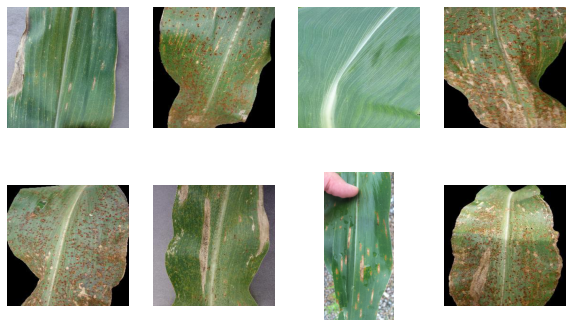

In [ ]:
show_random_images_from('dataset/*/*/*', seed=420)

In [ ]:
for i, j in enumerate(glob('dataset/*/*/*')):
  try:
    image = Image.open(j)
    cover = resizeimage.resize_cover(image, [224,224])
    cover.save(j)
  except:
    print(j, 'error.')

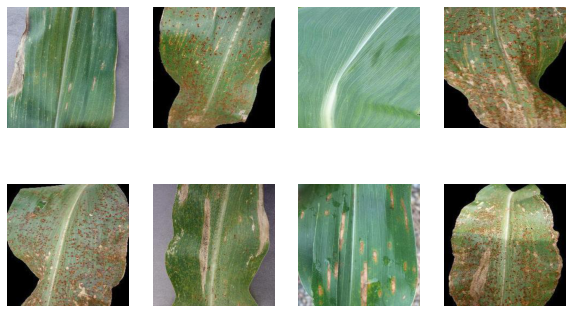

In [ ]:
show_random_images_from('dataset/*/*/*', seed=420)

In [ ]:
#making dir
root_dir = '/content/dataset'
train_dir = '/content/dataset/train'
validation_dir = '/content/dataset/dev'
test_dir = '/content/dataset/test'

In [ ]:
handle_base, pixels, FV_SIZE = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)

print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280


IMAGE GENERATOR

In [ ]:
import os
dir = os.listdir('/content/dataset/dev/Blight')
print(dir)

['Corn_Blight (1087).JPG', 'Corn_Blight (380).JPG', 'Corn_Blight (781).JPG', 'Corn_Blight (738).JPG', 'Corn_Blight (69).jpg', 'Corn_Blight (568).JPG', 'Corn_Blight (194).JPG', 'Corn_Blight (229).JPG', 'Corn_Blight (773).JPG', 'Corn_Blight (656).JPG', 'Corn_Blight (80).jpg', 'Corn_Blight (763).JPG', 'Corn_Blight (734).JPG', 'Corn_Blight (818).JPG', 'Corn_Blight (271).JPG', 'Corn_Blight (772).JPG', 'Corn_Blight (41).jpg', 'Corn_Blight (91).jpg', 'Corn_Blight (579).JPG', 'Corn_Blight (109).jpg', 'Corn_Blight (406).JPG', 'Corn_Blight (106).jpg', 'Corn_Blight (922).JPG', 'Corn_Blight (465).JPG', 'Corn_Blight (712).JPG', 'Corn_Blight (1140).jpg', 'Corn_Blight (619).JPG', 'Corn_Blight (843).JPG', 'Corn_Blight (118).JPG', 'Corn_Blight (853).jpg', 'Corn_Blight (967).JPG', 'Corn_Blight (1064).JPG', 'Corn_Blight (686).JPG', 'Corn_Blight (895).JPG', 'Corn_Blight (81).jpg', 'Corn_Blight (961).JPG', 'Corn_Blight (1003).JPG', 'Corn_Blight (24).jpg', 'Corn_Blight (788).JPG', 'Corn_Blight (492).JPG', '

In [ ]:
BATCH_SIZE = 64

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    shuffle = True,
    class_mode = 'categorical'
)

validation_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    shuffle = False,
    class_mode = 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    shuffle = False,
    class_mode = 'categorical'
)



Found 2588 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [ ]:
class_names = list(train_generator.class_indices.keys())

with open('labels.txt', 'w') as file:
  file.write('\n'. join(class_names))

In [ ]:
feature_extractor = hub.KerasLayer(
    MODULE_HANDLE,
    input_shape = IMAGE_SIZE + (3,),
    output_shape = [FV_SIZE],
    trainable = False
)

In [ ]:
print(MODULE_HANDLE)

model = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(len(class_names), activation='softmax')                            
])

model.summary()



https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 2,340,228
Trainable params: 82,244
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

train model

In [ ]:
from keras import callbacks

stop = callbacks.EarlyStopping(
    monitor = 'val_loss',
    mode = 'min',
    patience = 3,
    restore_best_weights = True
)

In [ ]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path("/content/dataset/train").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [ ]:
EPOCHS = 15

history = model.fit(
    train_generator,
    epochs = EPOCHS,
    validation_data = validation_generator,
    verbose = 1,
    callbacks = [stop]
)

Epoch 1/15
41/41 [==============================] - 126s 3s/step - loss: 0.3827 - accuracy: 0.8632 - val_loss: 0.4706 - val_accuracy: 0.7900
Epoch 2/15
41/41 [==============================] - 137s 3s/step - loss: 0.1878 - accuracy: 0.9247 - val_loss: 0.3810 - val_accuracy: 0.8487
Epoch 3/15
41/41 [==============================] - 123s 3s/step - loss: 0.1432 - accuracy: 0.9447 - val_loss: 0.3352 - val_accuracy: 0.8763
Epoch 4/15
41/41 [==============================] - 140s 3s/step - loss: 0.1293 - accuracy: 0.9463 - val_loss: 0.3353 - val_accuracy: 0.8625
Epoch 5/15
41/41 [==============================] - 125s 3s/step - loss: 0.1210 - accuracy: 0.9517 - val_loss: 0.3284 - val_accuracy: 0.8737
Epoch 6/15
41/41 [==============================] - 120s 3s/step - loss: 0.1259 - accuracy: 0.9474 - val_loss: 0.2977 - val_accuracy: 0.8750
Epoch 7/15
41/41 [==============================] - 121s 3s/step - loss: 0.0926 - accuracy: 0.9641 - val_loss: 0.3171 - val_accuracy: 0.8838
Epoch 8/15
41

In [ ]:
score = model.evaluate(validation_generator)
score = model.evaluate(test_generator)

13/13 [==============================] - 23s 2s/step - loss: 0.2744 - accuracy: 0.8888


MODEL EVALUATION AND METRICS

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

conf = confusion_matrix(test_generator.classes, y_pred)

print(classification_report(test_generator.classes, y_pred, target_names=class_names))


                precision    recall  f1-score   support

        Blight       0.86      0.76      0.81       200
   Common_Rust       0.88      0.98      0.93       200
Gray_Leaf_Spot       0.84      0.81      0.83       200
       Healthy       0.97      1.00      0.99       200

      accuracy                           0.89       800
     macro avg       0.89      0.89      0.89       800
  weighted avg       0.89      0.89      0.89       800



EXPORT

In [ ]:
model.save('model_v4.h5')
model.save('model_v4')
!zip -r 'model_v4.zip' 'model_v4'

INFO:tensorflow:Assets written to: model_v4/assets


INFO:tensorflow:Assets written to: model_v4/assets


  adding: model_v4/ (stored 0%)
  adding: model_v4/assets/ (stored 0%)
  adding: model_v4/saved_model.pb (deflated 92%)
  adding: model_v4/keras_metadata.pb (deflated 85%)
  adding: model_v4/variables/ (stored 0%)
  adding: model_v4/variables/variables.index (deflated 78%)
  adding: model_v4/variables/variables.data-00000-of-00001 (deflated 8%)


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model('model_v4')

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]

# Invoke the converter to generate the TFLite model
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('./model_v4.tflite')
tflite_model_file.write_bytes(tflite_model)

2730208